<a href="https://colab.research.google.com/github/hdhd7/MalashinLabs/blob/main/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist

#загрузка мниста
(x_train, y_train), _ = mnist.load_data()

#сохранение данных в файл custom.npz
np.savez("custom.npz", x_train=x_train, y_train=y_train)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5


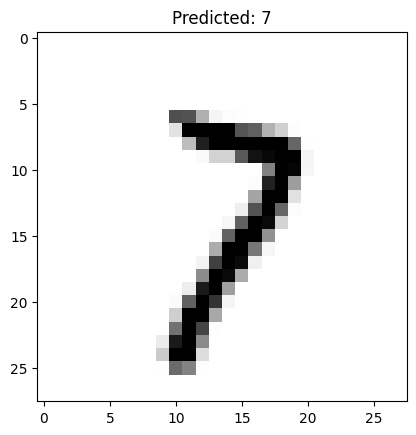

[[0.01630918]
 [0.18721366]
 [0.05089132]
 [0.0660876 ]
 [0.13427791]
 [0.05833992]
 [0.0393473 ]
 [0.23202079]
 [0.09096498]
 [0.16143751]]


In [4]:
"""активация через сигмоиду"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit  #сигмоидальная функция

#функции активации
def sigmoid(x):
    return expit(x)  #сигмоидальная функция

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))  #производная для обучения

#загрузка данных
def load_dataset():
    with np.load("custom.npz") as f:
        x_train = f["x_train"].astype("float32") / 255  #нормализация данных
        x_train = np.reshape(x_train, (x_train.shape[0], -1))  #преобразование в (60000, 784)
        y_train = f["y_train"]
        y_train = np.eye(10)[y_train]  #преобразование меток в one-hot
    return x_train, y_train

#нейронная сеть
class SimpleNN:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.001, lambda_reg=0.01):
        self.w1 = np.random.randn(hidden_size, input_size) * 0.01  #инициализация с меньшими весами
        self.b1 = np.zeros((hidden_size, 1))  #инициализация смещения для первого слоя
        self.w2 = np.random.randn(output_size, hidden_size) * 0.01  # Инициализация с меньшими весами
        self.b2 = np.zeros((output_size, 1))  #инициализация смещения для второго слоя
        self.learning_rate = learning_rate
        self.lambda_reg = lambda_reg

    def forward(self, x):
        self.l1 = np.dot(self.w1, x) + self.b1
        self.y = sigmoid(self.l1)  #использование сигмоиды
        self.l2 = np.dot(self.w2, self.y) + self.b2
        self.out = sigmoid(self.l2)  #использование сигмоиды
        return self.out

    def backward(self, x, target):
        e = self.out - target

        delta2 = e * sigmoid_derivative(self.out)  #градиент на выходе
        grad_w2 = np.dot(delta2, self.y.T) + self.lambda_reg * self.w2  #градиент для w2
        grad_b2 = np.sum(delta2, axis=1, keepdims=True)  #градиент для b2

        delta1 = np.dot(self.w2.T, delta2) * sigmoid_derivative(self.y)  #градиент для скрытого слоя
        grad_w1 = np.dot(delta1, x.T) + self.lambda_reg * self.w1  #градиент для w1
        grad_b1 = np.sum(delta1, axis=1, keepdims=True)  #градиент для b1

        #обновление весов и смещений
        self.w2 -= self.learning_rate * grad_w2
        self.b2 -= self.learning_rate * grad_b2
        self.w1 -= self.learning_rate * grad_w1
        self.b1 -= self.learning_rate * grad_b1

    def train(self, x_train, y_train, epochs=5, batch_size=32):
        for epoch in range(epochs):
            print(f'Epoch {epoch + 1}/{epochs}')
            indices = np.arange(x_train.shape[0])
            np.random.shuffle(indices)  #перемешивание данных
            for start in range(0, x_train.shape[0], batch_size):
                end = min(start + batch_size, x_train.shape[0])
                batch_indices = indices[start:end]

                for i in batch_indices:
                    img = x_train[i].reshape(-1, 1)
                    value = y_train[i].reshape(-1, 1)

                    self.forward(img)
                    self.backward(img, value)

input_data, target_data = load_dataset()  #загрузка данных
nn = SimpleNN(input_size=784, hidden_size=50, output_size=10)  #инициализация нейронной сети

nn.train(input_data, target_data, epochs=5, batch_size=32)

#тестирование на случайном изображении
i = np.random.randint(0, input_data.shape[0])
tempimg = input_data[i]
tempvalue = target_data[i]

img = tempimg.reshape(-1, 1)
out = nn.forward(img)

plt.imshow(tempimg.reshape(28, 28), cmap="Greys")
plt.title(f'Predicted: {out.argmax()}')
plt.show()

print(out)

Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5


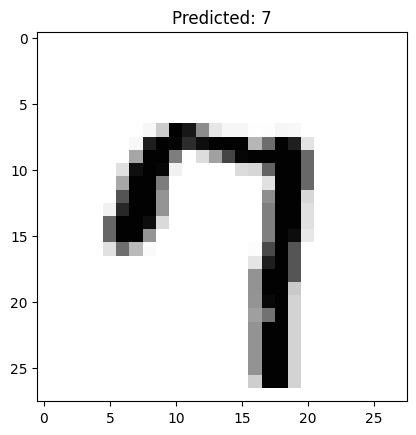

[[0.06670782]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.67920083]
 [0.        ]
 [0.23673841]]


In [5]:
"""активация через Relu"""
import numpy as np
import matplotlib.pyplot as plt

# Функции активации
def relu(x):
    return np.maximum(0, x)

def drelu(x):
    return np.where(x > 0, 1, 0)

# Загрузка данных
def load_dataset():
    with np.load("custom.npz") as f:
        x_train = f["x_train"].astype("float32") / 255  # Нормализация данных
        x_train = np.reshape(x_train, (x_train.shape[0], -1))
        y_train = f["y_train"]
        y_train = np.eye(10)[y_train]  # Преобразование меток в one-hot
    return x_train, y_train

# Нейронная сеть
class SimpleNN:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.001, lambda_reg=0.01):
        self.w1 = np.random.randn(hidden_size, input_size) * 0.01 # Инициализация с меньшими весами
        self.b1 = np.zeros((hidden_size, 1))  # Инициализация смещения для первого слоя
        self.w2 = np.random.randn(output_size, hidden_size) * 0.01 # Инициализация с меньшими весами
        self.b2 = np.zeros((output_size, 1))  # Инициализация смещения для второго слоя
        self.learning_rate = learning_rate
        self.lambda_reg = lambda_reg

    def forward(self, x):
        self.l1 = np.dot(self.w1, x) + self.b1
        self.y = relu(self.l1)
        self.l2 = np.dot(self.w2, self.y) + self.b2
        self.out = relu(self.l2)  # Можно использовать softmax для классификации
        return self.out

    def backward(self, x, target):
        e = self.out - target

        delta2 = e * drelu(self.l2)  # Градиент на выходе
        grad_w2 = np.dot(delta2, self.y.T) + self.lambda_reg * self.w2  # Градиент для w2
        grad_b2 = np.sum(delta2, axis=1, keepdims=True) # Градиент для b2

        delta1 = np.dot(self.w2.T, delta2) * drelu(self.l1) # Градиент для скрытого слоя
        grad_w1 = np.dot(delta1, x.T) + self.lambda_reg * self.w1  # Градиент для w1
        grad_b1 = np.sum(delta1, axis=1, keepdims=True) # Градиент для b1

        # Обновление весов и смещений
        self.w2 -= self.learning_rate * grad_w2
        self.b2 -= self.learning_rate * grad_b2
        self.w1 -= self.learning_rate * grad_w1
        self.b1 -= self.learning_rate * grad_b1

    def train(self, x_train, y_train, epochs=5, batch_size=32):
        for epoch in range(epochs):
            print(f'Epoch {epoch + 1}/{epochs}')
            indices = np.arange(x_train.shape[0])
            np.random.shuffle(indices)  # Перемешивание данных
            for start in range(0, x_train.shape[0], batch_size):
                end = min(start + batch_size, x_train.shape[0])
                batch_indices = indices[start:end]

                for i in batch_indices:
                    img = x_train[i].reshape(-1, 1)
                    value = y_train[i].reshape(-1, 1)

                    self.forward(img)
                    self.backward(img, value)
# Основной код
input_data, target_data = load_dataset()
nn = SimpleNN(input_size=784, hidden_size=50, output_size=10)

# Обучение модели
nn.train(input_data, target_data, epochs=5, batch_size=32)

# Тестирование на случайном изображении
i = np.random.randint(0, input_data.shape[0])
tempimg = input_data[i]
tempvalue = target_data[i]

img = tempimg.reshape(-1, 1)
out = nn.forward(img)

plt.imshow(tempimg.reshape(28, 28), cmap="Greys")
plt.title(f'Predicted: {out.argmax()}')
plt.show()

print(out)
